#Predicción de Precios de Casas
###Objetivo
El objetivo de este proyecto es desarrollar y evaluar varios modelos de aprendizaje automático para predecir el precio de venta de casas. Utilizaremos técnicas de regresión para encontrar el mejor modelo que prediga con mayor precisión los precios de venta basándonos en las características de las casas disponibles en el dataset.

###Descripción del Dataset
El dataset utilizado en este proyecto es el de precios de casas de Ames, Iowa. Este dataset incluye diversas características de las casas, como el área del terreno, el año de construcción, el número de habitaciones, el tipo de zona, entre otros. Estas características nos ayudarán a entender y predecir los precios de venta.

####El dataset contiene:

Variables numéricas y categóricas.
Características relacionadas con el tamaño, calidad y ubicación de las casas.
####Pasos del Proyecto
####Carga y Exploración de Datos:
Cargaremos el dataset y realizaremos un análisis exploratorio para entender la distribución de los datos y la relación entre las variables.
####Preprocesamiento de Datos:
Limpiaremos los datos, manejaremos valores ausentes y convertiremos las variables categóricas en variables dummy.
####División del Dataset:
 Dividiremos el dataset en conjuntos de entrenamiento y prueba.
####Estandarización de Datos:
 Estandarizaremos las características numéricas para asegurar que todas las variables tengan la misma escala.
####Entrenamiento de Modelos:
Regresión Lineal
Regresión Ridge
Regresión Lasso
Random Forest
Gradient Boosting

###Optimización de Modelos:
 Utilizaremos GridSearchCV para encontrar los mejores hiperparámetros para los modelos Ridge, Random Forest y Gradient Boosting.
###Evaluación de Modelos: Evaluaremos el rendimiento de cada modelo utilizando la métrica de Error Cuadrático Medio (RMSE) y compararemos los resultados.
###Selección del Mejor Modelo:

Basándonos en el RMSE, seleccionaremos el modelo que ofrece la mejor precisión para la predicción de precios de casas.

Al final del proyecto, habremos desarrollado un modelo robusto y optimizado que podrá predecir el precio de venta de una casa con alta precisión, y habremos documentado el proceso completo de manera clara y comprensible.

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

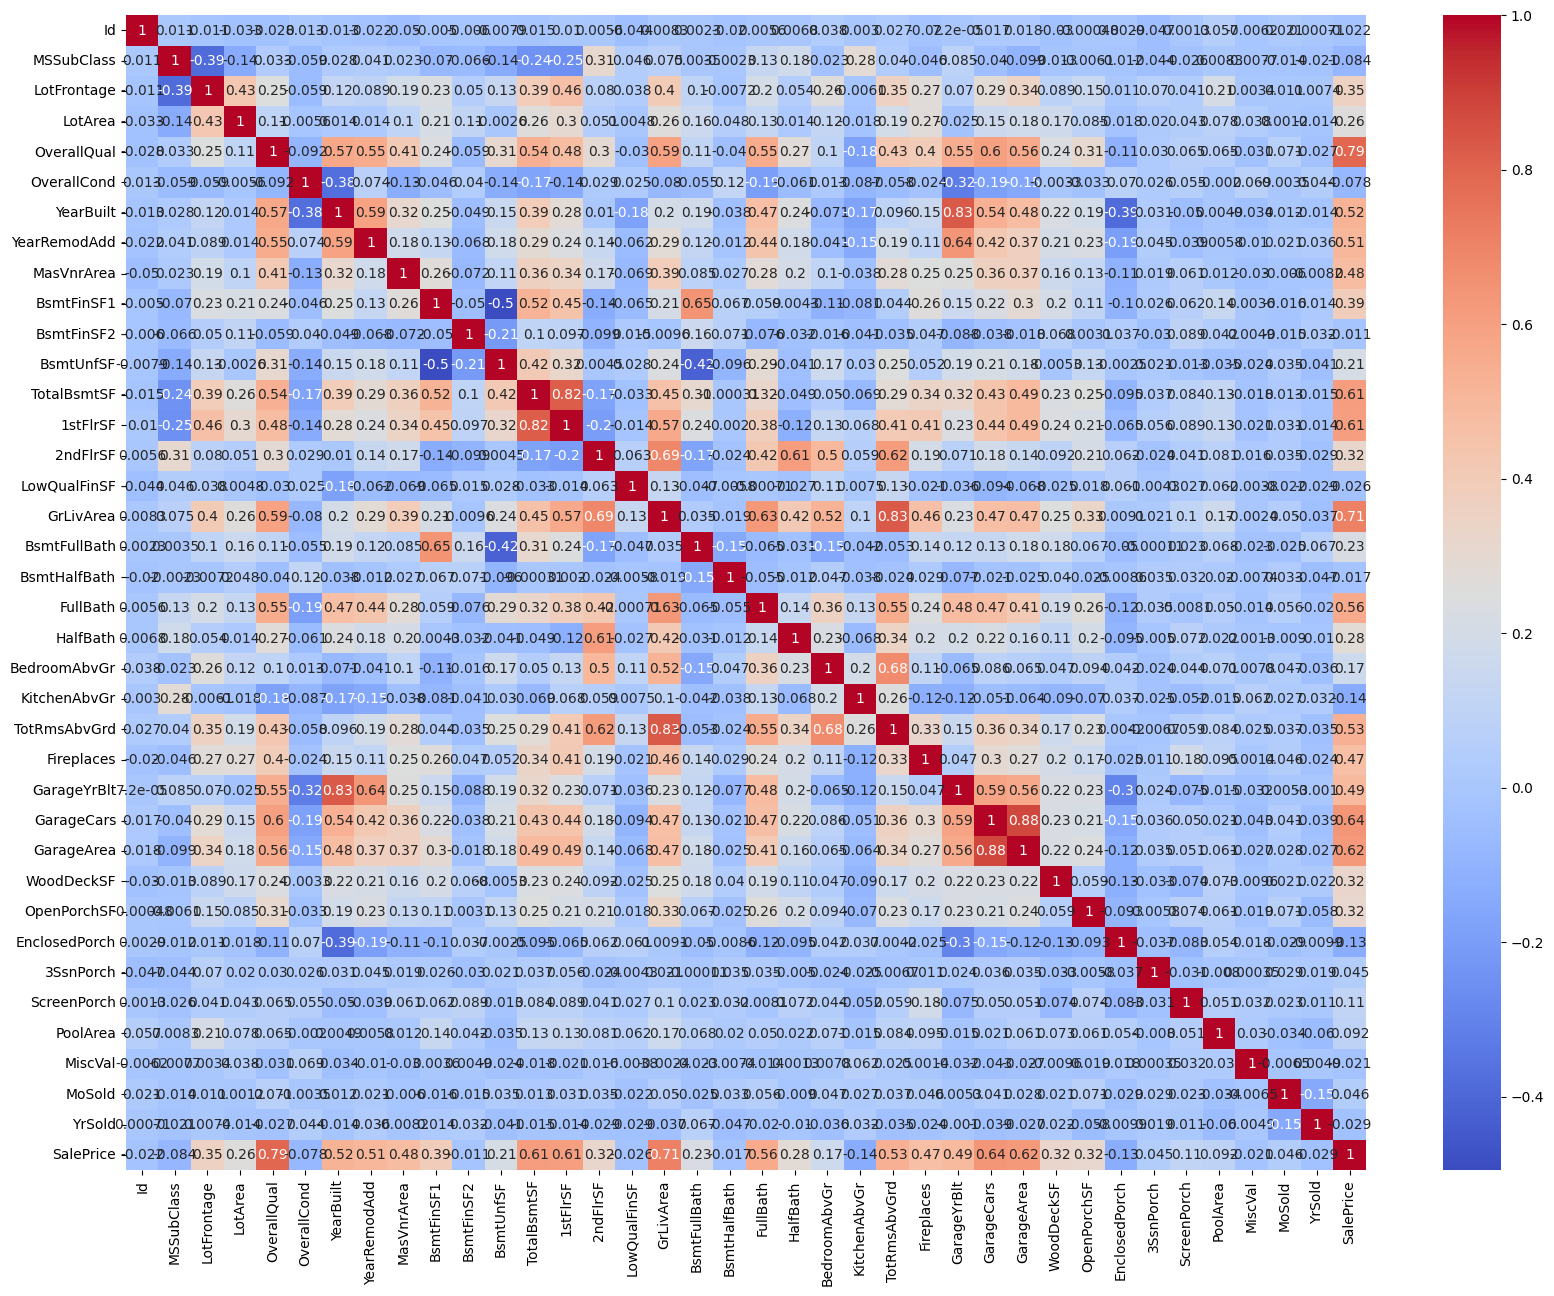

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados de treinamento
data = pd.read_csv('/content/train,casasprecio.csv')

# Exibir as primeiras linhas do dataset
print(data.head())

# Informações gerais do dataset
print(data.info())

# Estatísticas descritivas
print(data.describe())

# Selecionar apenas as colunas numéricas
numeric_features = data.select_dtypes(include=[np.number])

# Verificar a correlação entre as variáveis numéricas
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.show()


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


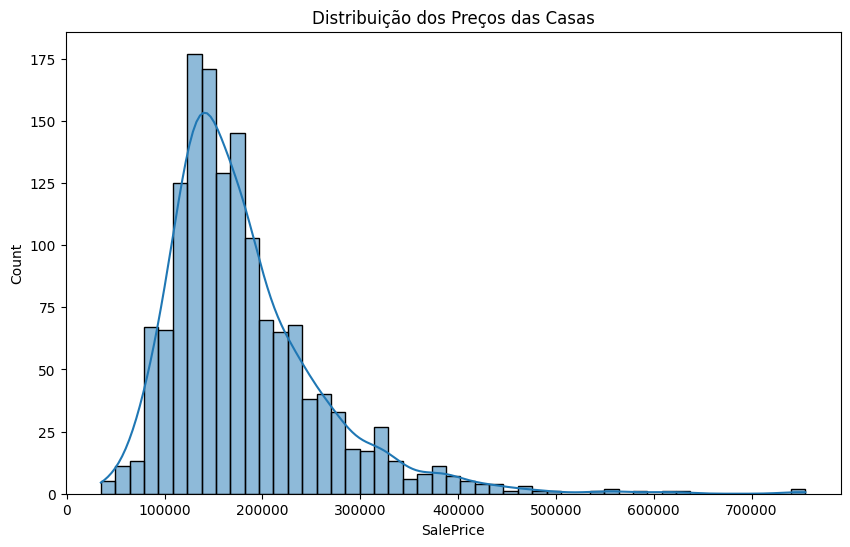

In [2]:
# Verificar valores ausentes
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values)

# Visualizar a distribuição do preço das casas
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribuição dos Preços das Casas')
plt.show()


In [3]:
# Tratar valores ausentes (exemplo básico)
# Preenchendo valores ausentes numéricos com a mediana
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Preenchendo valores ausentes categóricos com 'None'
for col in data.select_dtypes(include=[object]).columns:
    data[col].fillna('None', inplace=True)

# Codificação de variáveis categóricas
data = pd.get_dummies(data)

# Separar as variáveis independentes (X) e a variável dependente (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Dividir os dados em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 3.54540941838235e+33
R^2 Score: -4.6222407269462506e+23


#Modelo de Regresión Ridge
La regresión Ridge es una forma de regularización de la regresión lineal que añade una penalización a los coeficientes para evitar el sobreajuste. Es útil cuando hay multicolinealidad en los datos.

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Crear el modelo Ridge
ridge_model = Ridge(alpha=1.0)  # alpha es el parámetro de regularización

# Evaluar el modelo con validación cruzada
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = np.sqrt(-ridge_scores)  # Convertir MSE negativo a RMSE

# Promedio de RMSE
ridge_rmse_mean = ridge_rmse_scores.mean()

print(f'Ridge Regression RMSE: {ridge_rmse_mean}')


Ridge Regression RMSE: 35190.20296979438


#Modelo de Regresión Lasso
La regresión Lasso también es una forma de regularización, pero Lasso tiende a realizar una selección de características, eliminando algunos coeficientes.

In [6]:
from sklearn.linear_model import Lasso

# Crear el modelo Lasso
lasso_model = Lasso(alpha=0.1)  # alpha es el parámetro de regularización

# Evaluar el modelo con validación cruzada
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_rmse_scores = np.sqrt(-lasso_scores)

# Promedio de RMSE
lasso_rmse_mean = lasso_rmse_scores.mean()

print(f'Lasso Regression RMSE: {lasso_rmse_mean}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.282e+10, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.527e+11, tolerance: 5.256e

Lasso Regression RMSE: 34569.04858370406


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.309e+10, tolerance: 5.796e+08
  model = cd_fast.enet_coordinate_descent(


#Modelo de Random Forest
El Random Forest es un modelo de ensemble que utiliza múltiples árboles de decisión para mejorar la precisión de las predicciones

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluar el modelo con validación cruzada
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)

# Promedio de RMSE
rf_rmse_mean = rf_rmse_scores.mean()

print(f'Random Forest RMSE: {rf_rmse_mean}')


Random Forest RMSE: 30702.47718496482


#Modelo de Gradient Boosting
El Gradient Boosting es otro método de ensemble que construye modelos secuencialmente para minimizar el error.

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear el modelo Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Evaluar el modelo con validación cruzada
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
gb_rmse_scores = np.sqrt(-gb_scores)

# Promedio de RMSE
gb_rmse_mean = gb_rmse_scores.mean()

print(f'Gradient Boosting RMSE: {gb_rmse_mean}')


Gradient Boosting RMSE: 29928.09700673769


In [9]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en rejilla
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Configurar el GridSearchCV para Ridge Regression
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos de entrenamiento
ridge_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
ridge_best_params = ridge_grid.best_params_
ridge_best_model = ridge_grid.best_estimator_

# Hacer predicciones y evaluar el modelo optimizado
y_pred_ridge_optimized = ridge_best_model.predict(X_test)
ridge_optimized_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge_optimized))

print(f'Ridge Regression Optimized RMSE: {ridge_optimized_rmse}')
print(f'Best Ridge Params: {ridge_best_params}')


Ridge Regression Optimized RMSE: 28548.530126120335
Best Ridge Params: {'alpha': 100.0}


In [10]:
# Definir los parámetros para la búsqueda en rejilla
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}

# Configurar el GridSearchCV para Random Forest
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos de entrenamiento
rf_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
rf_best_params = rf_grid.best_params_
rf_best_model = rf_grid.best_estimator_

# Hacer predicciones y evaluar el modelo optimizado
y_pred_rf_optimized = rf_best_model.predict(X_test)
rf_optimized_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_optimized))

print(f'Random Forest Optimized RMSE: {rf_optimized_rmse}')
print(f'Best Random Forest Params: {rf_best_params}')


Random Forest Optimized RMSE: 29184.56461135994
Best Random Forest Params: {'max_depth': 10, 'n_estimators': 200}


In [11]:
# 5. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print(f'Gradient Boosting RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb))}')

Gradient Boosting RMSE: 28093.0650436677


In [12]:
# Definir los parámetros para la búsqueda en rejilla
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Configurar el GridSearchCV para Gradient Boosting
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo a los datos de entrenamiento
gb_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
gb_best_params = gb_grid.best_params_
gb_best_model = gb_grid.best_estimator_

# Hacer predicciones y evaluar el modelo optimizado
y_pred_gb_optimized = gb_best_model.predict(X_test)
gb_optimized_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb_optimized))

print(f'Gradient Boosting Optimized RMSE: {gb_optimized_rmse}')
print(f'Best Gradient Boosting Params: {gb_best_params}')


Gradient Boosting Optimized RMSE: 28587.93394340395
Best Gradient Boosting Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [13]:

# Resultados obtenidos de los diferentes modelos optimizados
ridge_optimized_rmse = 28548.530126120335  # Resultado obtenido del modelo Ridge optimizado
rf_optimized_rmse =  29184.56461135994  # Resultado obtenido del modelo Random Forest optimizado
gb_optimized_rmse =  28587.93394340395 # Resultado obtenido del modelo Gradient Boosting optimizado

# Comparar los RMSE
print(f'Ridge Regression Optimized RMSE: {ridge_optimized_rmse}')
print(f'Random Forest Optimized RMSE: {rf_optimized_rmse}')
print(f'Gradient Boosting Optimized RMSE: {gb_optimized_rmse}')


Ridge Regression Optimized RMSE: 28548.530126120335
Random Forest Optimized RMSE: 29184.56461135994
Gradient Boosting Optimized RMSE: 28587.93394340395


In [14]:
# aqui vemos que el modelo ridge performo mejor entre todos

In [ ]:
#aqui podemos guardar el mejor modelo performado con joblib y asi aplicarlo a los futuros datos que tengamos

In [15]:
import joblib

# Supongamos que tu modelo entrenado es 'ridge_model'
joblib.dump(ridge_model, 'ridge_model.pkl')


['ridge_model.pkl']

In [16]:
#preparar datos y hacer el data wrangling

In [17]:
# Cargar el modelo guardado
loaded_model = joblib.load('ridge_model.pkl')


In [19]:
#Usar el modelo cargado para predecir los precios de los nuevos apartamentos.
# Supongamos que 'new_data' es el DataFrame con los nuevos datos preprocesados
'''
predictions = loaded_model.predict(ejemplo new data)
'''

'\npredictions = loaded_model.predict(ejemplo new data)\n'

In [20]:
'''

# Función para preprocesar los datos
def preprocess_data(data):
    # Realiza aquí el preprocesamiento que hiciste en tu modelo original
    # Por ejemplo: manejo de valores nulos, normalización, etc.
       # data = data.fillna(0)  # Ejemplo de llenado de valores nulos
    return processed_data
'''

'\n\n# Función para preprocesar los datos\ndef preprocess_data(data):\n    # Realiza aquí el preprocesamiento que hiciste en tu modelo original\n    # Por ejemplo: manejo de valores nulos, normalización, etc.\n    return processed_data\n'

In [21]:
'''
# Cargar el modelo guardado
model = joblib.load('ridge_model.pkl')

# Cargar nuevos datos
new_data = pd.read_csv('new_apartment_data.csv')

# Preprocesar los nuevos datos
processed_data = preprocess_data(new_data)

# Hacer predicciones
predictions = model.predict(processed_data)

# Guardar las predicciones en un archivo
output = pd.DataFrame({'ApartmentID': new_data['ApartmentID'], 'PredictedPrice': predictions})
output.to_csv('predicted_prices.csv', index=False)


'''

"\n# Cargar el modelo guardado\nmodel = joblib.load('ridge_model.pkl')\n\n# Cargar nuevos datos\nnew_data = pd.read_csv('new_apartment_data.csv')\n\n# Preprocesar los nuevos datos\nprocessed_data = preprocess_data(new_data)\n\n# Hacer predicciones\npredictions = model.predict(processed_data)\n\n# Guardar las predicciones en un archivo\noutput = pd.DataFrame({'ApartmentID': new_data['ApartmentID'], 'PredictedPrice': predictions})\noutput.to_csv('predicted_prices.csv', index=False)\n\n\n"